# Compare classification results as we sweep the ECT parameter space 

In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(viridis))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(reshape2))
suppressPackageStartupMessages(library(dplyr))

## Setup

In [2]:
source('/home/ejam/documents/barley_stacks/barley/descriptor_analysis_utils.R')
setwd('/home/ejam/documents/barley_stacks/preproc/norm_ect/results')
TT <- c(4,8,16,32,64)
kernel <- 'laplacedot'
dims <- 12
norm <- 'Normalized Size'


In [3]:
founders <- read.csv(paste('ect_d74_T4.csv',sep=''))
founders_names_original <- levels(unique(founders$Founder))
founders_names <- founders_names_original
founders_names[5] <- 'CA Mariout'
founders_names[11] <- 'Good Delta'
founders_names[17] <- 'Maison Carree'
founders_names[24] <- 'Palmella Blue'
founders_names[28] <- 'WI Winter'
print(founders_names)

 [1] "Algerian"        "Alpha"           "Arequipa"        "Atlas"          
 [5] "CA Mariout"      "Club Mariout"    "Everest"         "Flynn"          
 [9] "Glabron"         "Golden Pheasant" "Good Delta"      "Han River"      
[13] "Hannchen"        "Horn"            "Lion"            "Lyallpur"       
[17] "Maison Carree"   "Manchuria"       "Meloy"           "Minia"          
[21] "Multan"          "Oderbrucker"     "Orel"            "Palmella Blue"  
[25] "Sandrel"         "Trebi"           "White Smyrna"    "WI Winter"      


In [7]:
unpack_scores <- function(norm, info_type, d, TT, kernel, dims){
    precision <- list()
    recall <- list()
    f1 <- list()
    for(idx in 1:length(TT)){
        filename <- paste('svm_results',tolower(gsub(' ', '_', norm)), 
                  tolower(info_type), d, TT[idx], kernel, dims, 'founders.rds', sep='_')
        results <- base::readRDS(filename)
        foolist <- get_confusion(results)
        
        mixed_precision <- foolist[[3]]
        mixed_recall <- foolist[[4]]
        mixed_f1 <- foolist[[5]]
        support <- foolist[[6]]
        
        precision[[idx]] <- average_scores(mixed_precision, support)
        recall[[idx]] <- average_scores(mixed_recall, support)
        f1[[idx]] <- average_scores(mixed_f1, support)
    }
    return(list(precision, recall, f1))
}

In [13]:
info_type <- 'Combined'
d <- 74
foolist <- unpack_scores(norm, info_type, d, TT, kernel, dims)
p74 <- foolist[[1]]
r74 <- foolist[[2]]
f74 <- foolist[[3]]

d <- 101
foolist <- unpack_scores(norm, info_type, d, TT, kernel, dims)
p101 <- foolist[[1]]
r101 <- foolist[[2]]
f101 <- foolist[[3]]

d <- 158
foolist <- unpack_scores(norm, info_type, d, TT, kernel, dims)
p158 <- foolist[[1]]
r158 <- foolist[[2]]
f158 <- foolist[[3]]

d <- 230
foolist <- unpack_scores(norm, info_type, d, TT, kernel, dims)
p230 <- foolist[[1]]
r230 <- foolist[[2]]
f230 <- foolist[[3]]

In [36]:
melt_values <- function(acc_list1, acc_list2, acc_list3, acc_list4,
                        d1, d2, d3, d4, TT){
    
    df1 <- data.frame(t(matrix(unlist(acc_list1), nrow=length(acc_list1), byrow=TRUE)))
    df2 <- data.frame(t(matrix(unlist(acc_list2), nrow=length(acc_list2), byrow=TRUE)))
    df3 <- data.frame(t(matrix(unlist(acc_list3), nrow=length(acc_list3), byrow=TRUE)))
    df4 <- data.frame(t(matrix(unlist(acc_list4), nrow=length(acc_list4), byrow=TRUE)))
    colnames(df1) <- as.character(TT)
    colnames(df2) <- as.character(TT)
    colnames(df3) <- as.character(TT)
    colnames(df4) <- as.character(TT)

    dfm1 <- reshape2::melt(df1, variable.name='Thresholds', value.name='Accuracy')
    dfm1$Thresholds <- factor(dfm1$Thresholds, levels=unique(dfm1$Thresholds))
    dfm1$Directions <- d1
    dfm2 <- reshape2::melt(df2, variable.name='Thresholds', value.name='Accuracy')
    dfm2$Thresholds <- factor(dfm2$Thresholds, levels=unique(dfm2$Thresholds))
    dfm2$Directions <- d2

    dfm3 <- reshape2::melt(df3, variable.name='Thresholds', value.name='Accuracy')
    dfm3$Thresholds <- factor(dfm3$Thresholds, levels=unique(dfm3$Thresholds))
    dfm3$Directions <- d3

    dfm4 <- reshape2::melt(df4, variable.name='Thresholds', value.name='Accuracy')
    dfm4$Thresholds <- factor(dfm4$Thresholds, levels=unique(dfm4$Thresholds))
    dfm4$Directions <- d4
    
    dfm <- rbind(dfm1, dfm2, dfm3, dfm4)
    dfm$Directions <- factor(dfm$Directions, levels=sort(c(d1,d2,d3,d4)))
    
    return(dfm)
}

In [37]:
dfmp <- melt_values(p74, p158, p101, p230, 74, 158, 101, 230, TT)
dfmr <- melt_values(r74, r158, r101, r230, 74, 158, 101, 230, TT)
dfmf <- melt_values(f74, f158, f101, f230, 74, 158, 101, 230, TT)

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables



In [38]:
dfmp$Score <- 'Precision'
dfmr$Score <- 'Recall'

dfm <- rbind(dfmp, dfmr)
dfm$Score <- factor(dfm$Score, levels=c('Precision','Recall'))

#dfmf$Score <- 'F1'
#dfm <- rbind(dfmf, dfmp, dfmr)
#dfm$Score <- factor(dfm$Score, levels=c('F1','Precision','Recall'))

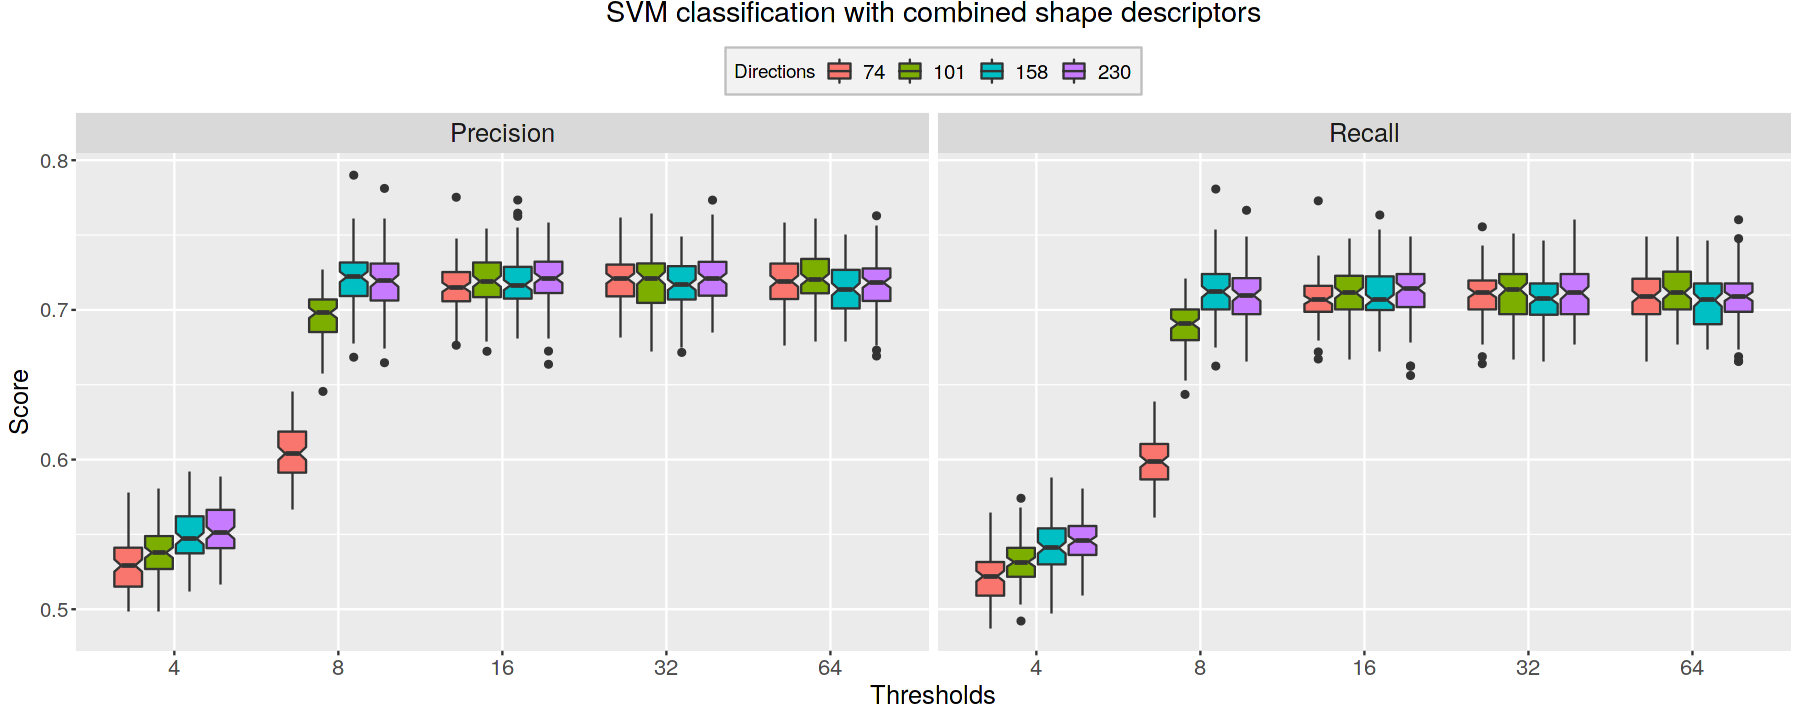

In [47]:
options(repr.plot.width=15, repr.plot.height=6)
descriptor <- 'Combined'
confusionname <- 'SVM classification with combined shape descriptors'

p <- ggplot2::ggplot(dfm, aes(x=Thresholds, y=Accuracy, fill=Directions)) + 
     ggplot2::geom_boxplot(notch=TRUE) +
     ggplot2::facet_grid(cols=vars(Score)) +
     theme(plot.title = element_text(hjust = 0.5, vjust = 2, size=17),
        axis.text.x = element_text(size = 13, angle=0),
        axis.text.y = element_text(size = 12),
        axis.title = element_text(size=15),
        legend.position = 'top',
        legend.text = element_text(size=12),
        strip.text = element_text(size=15),
        legend.background = element_rect(color='grey', fill='grey95')) +
     ylab(paste('Score', sep='')) +
     xlab(paste('Thresholds')) +
     ggtitle(confusionname)
p

filename <- paste('parameters',gsub(' ', '_', tolower(descriptor)), kernel, dims, sep='_')
ggplot2::ggsave(paste(filename, '.jpg', sep=''), dpi=300, plot=p, device='jpg', width=12, height=5)
ggplot2::ggsave(paste(filename, '.pdf', sep=''), plot=p, device='pdf', width=12, height=5)

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables



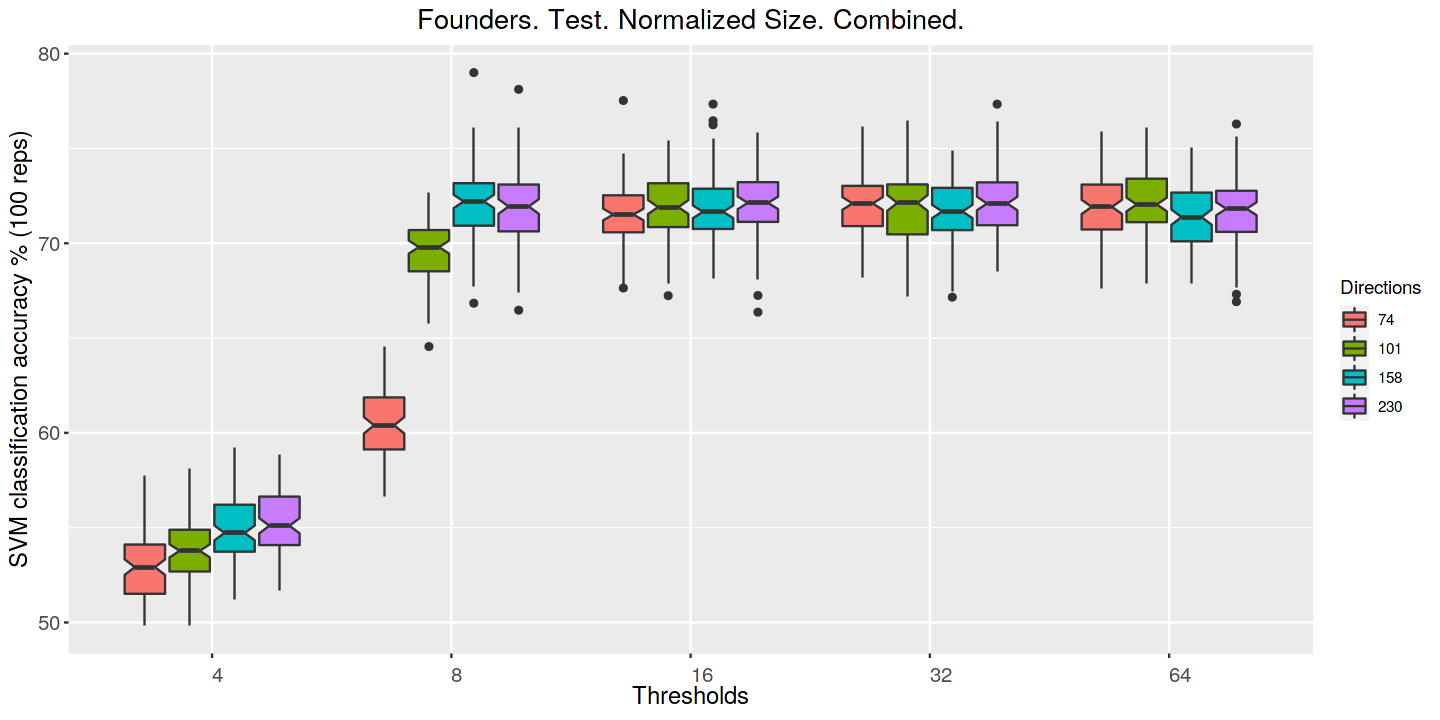

In [14]:
options(repr.plot.width=12, repr.plot.height=6)
info_type <- 'Combined'
source('/home/ejam/documents/barley_stacks/barley/descriptor_analysis_utils.R')
compare_direction_accuracies(p74, p158, 
                             p101, p230,
                             74, 158, 101, 230, TT,
                            info_type, kernel, dims, norm, FALSE)

No id variables; using all as measure variables



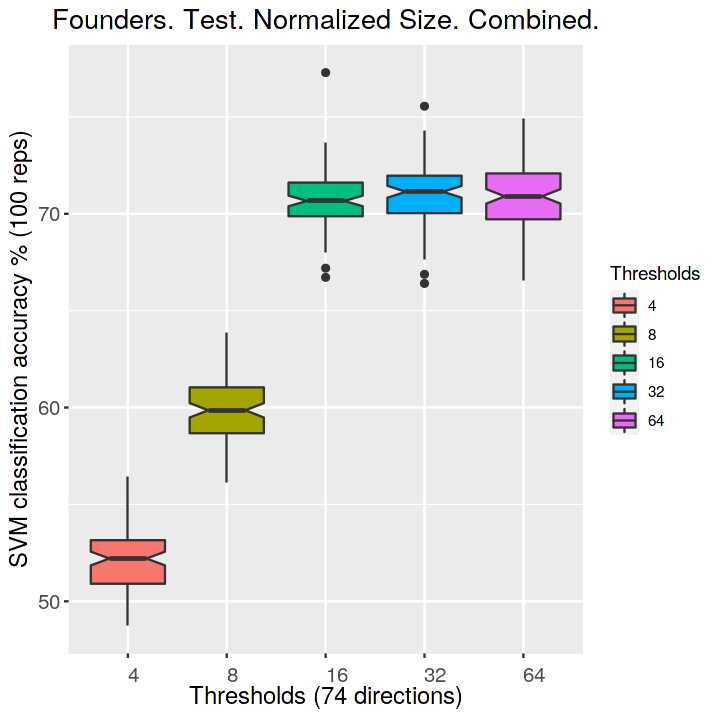

In [22]:
options(repr.plot.width=6, repr.plot.height=6)
compare_threshold_accuracies_total(mixed_accuracy_74, TT, 
                                  74, info_type, kernel, dims, norm)

In [25]:
info_type <- 'Topological'
d <- 74
topo_confusion_74 <- list()
topo_accuracy_74 <- list()

for(idx in 1:length(TT)){
    filename <- paste('svm_results',tolower(gsub(' ', '_', norm)), 
                  tolower(info_type), d, TT[idx], kernel, dims, 'founders.rds', sep='_')
    results <- base::readRDS(filename)
    foolist <- get_confusion(results)
    topo_confusion_74[[idx]] <- foolist[[1]]
    topo_accuracy_74[[idx]] <- foolist[[2]]
}

d <- 158
topo_confusion_158 <- list()
topo_accuracy_158 <- list()

for(idx in 1:length(TT)){
    filename <- paste('svm_results',tolower(gsub(' ', '_', norm)), 
                  tolower(info_type), d, TT[idx], kernel, dims, 'founders.rds', sep='_')
    results <- base::readRDS(filename)
    foolist <- get_confusion(results)
    topo_confusion_158[[idx]] <- foolist[[1]]
    topo_accuracy_158[[idx]] <- foolist[[2]]
}

d <- 101
topo_confusion_101 <- list()
topo_accuracy_101 <- list()

for(idx in 1:length(TT)){
    filename <- paste('svm_results',tolower(gsub(' ', '_', norm)), 
                  tolower(info_type), d, TT[idx], kernel, dims, 'founders.rds', sep='_')
    results <- base::readRDS(filename)
    foolist <- get_confusion(results)
    topo_confusion_101[[idx]] <- foolist[[1]]
    topo_accuracy_101[[idx]] <- foolist[[2]]
}

d <- 230
topo_confusion_230 <- list()
topo_accuracy_230 <- list()

for(idx in 1:length(TT)){
    filename <- paste('svm_results',tolower(gsub(' ', '_', norm)), 
                  tolower(info_type), d, TT[idx], kernel, dims, 'founders.rds', sep='_')
    results <- base::readRDS(filename)
    foolist <- get_confusion(results)
    topo_confusion_230[[idx]] <- foolist[[1]]
    topo_accuracy_230[[idx]] <- foolist[[2]]
}

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables



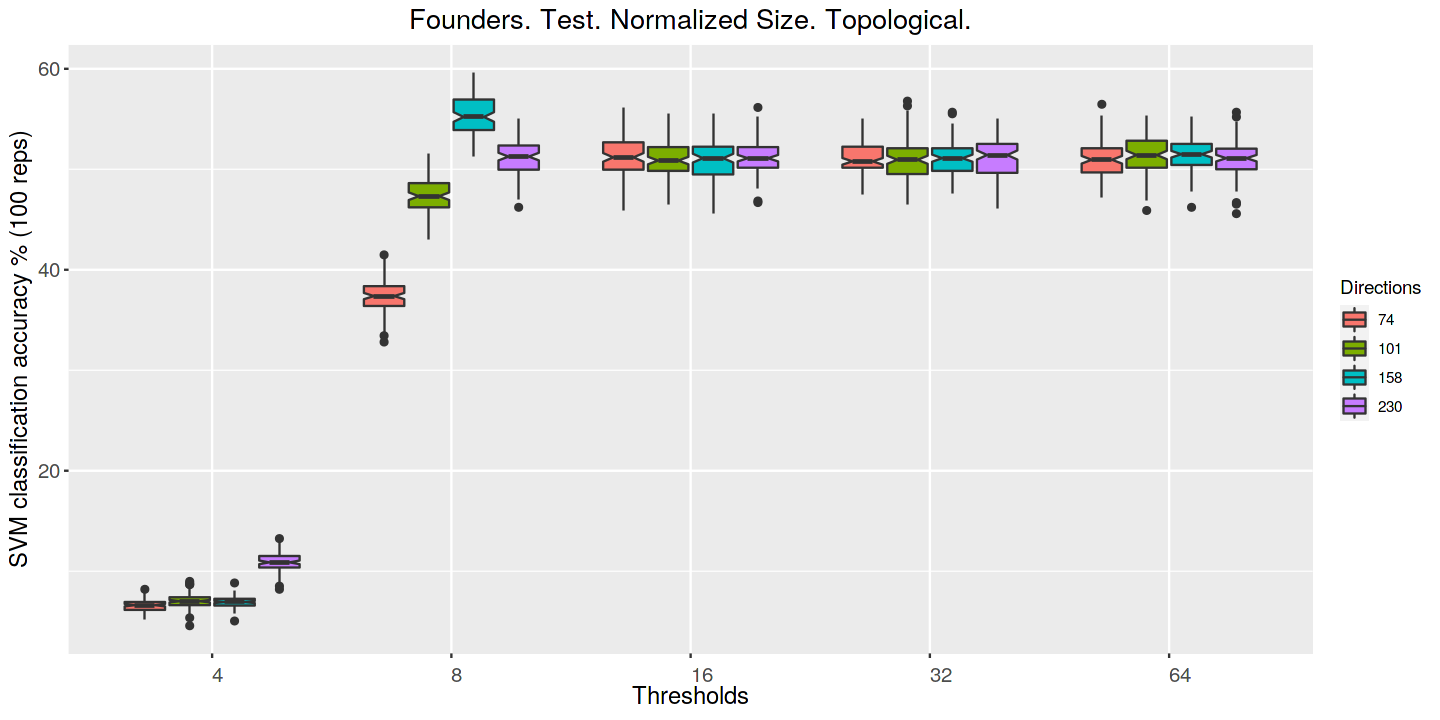

In [27]:
options(repr.plot.width=12, repr.plot.height=6)
info_type <- 'Topological'
compare_direction_accuracies(topo_accuracy_74, topo_accuracy_158, topo_accuracy_101, topo_accuracy_230,
                             74, 158, 101, 230, TT,
                            info_type, kernel, dims, norm, TRUE)

No id variables; using all as measure variables



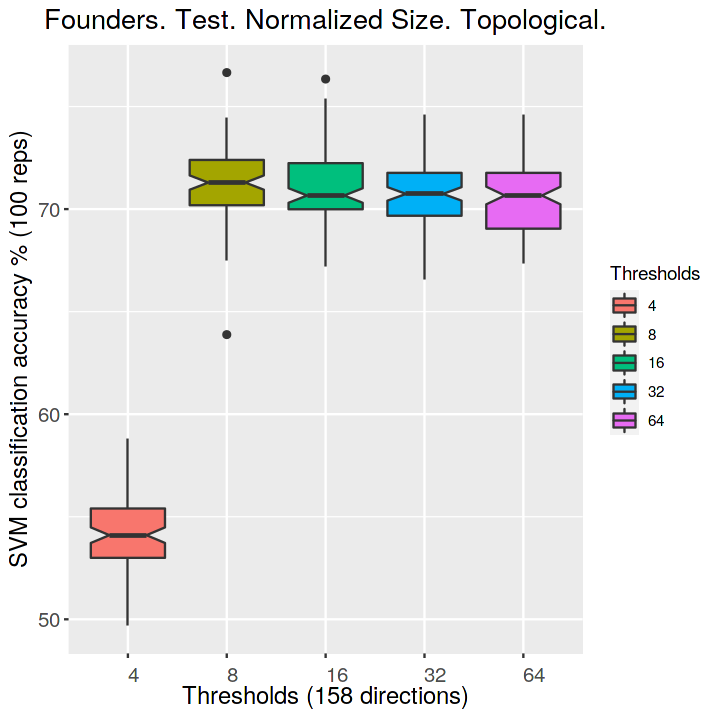

In [24]:
options(repr.plot.width=6, repr.plot.height=6)
compare_threshold_accuracies_total(mixed_accuracy_158, TT, 
                                  158, info_type, kernel, dims, norm)

In [35]:
df_mixed_confusion74 <- unlist_confusion(mixed_confusion_74, founders_names, TT)
df_mixed_confusion158 <- unlist_confusion(mixed_confusion_158, founders_names, TT)

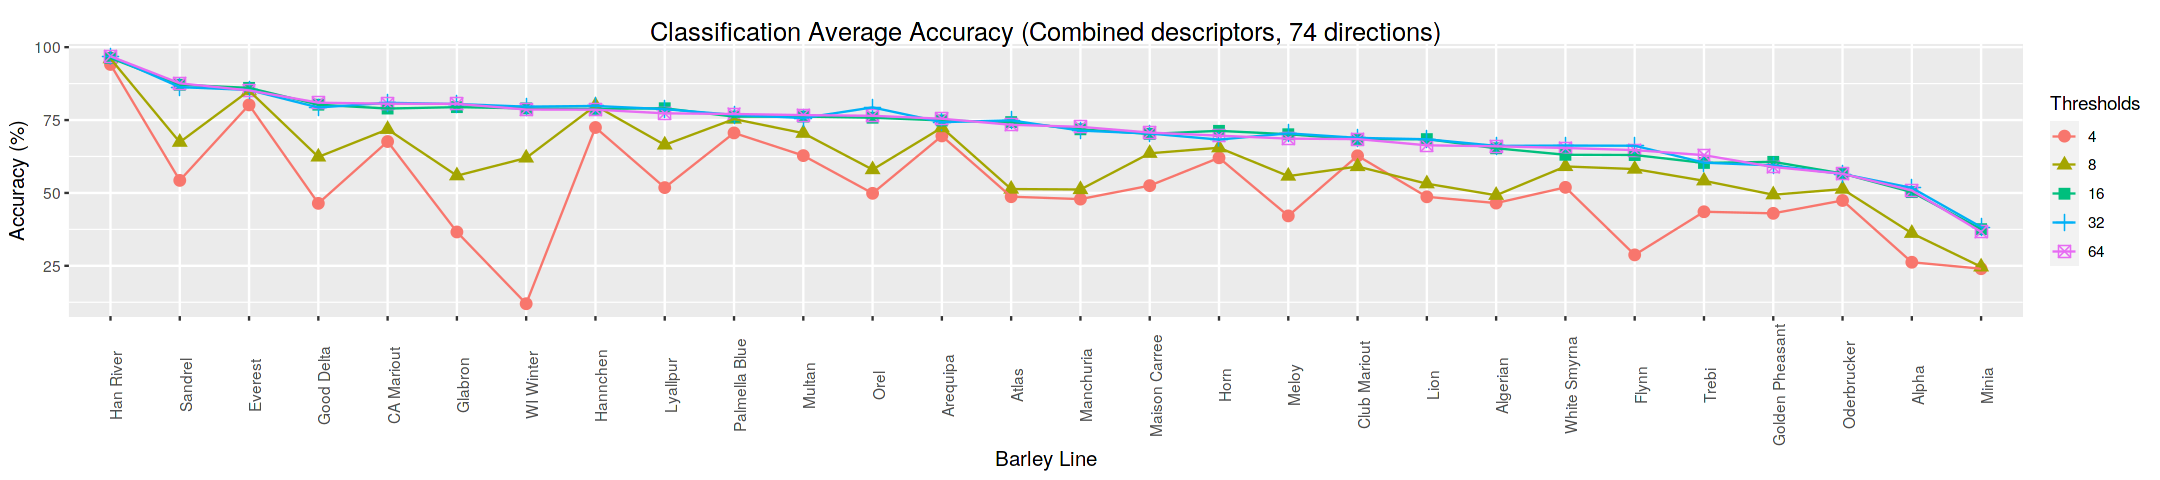

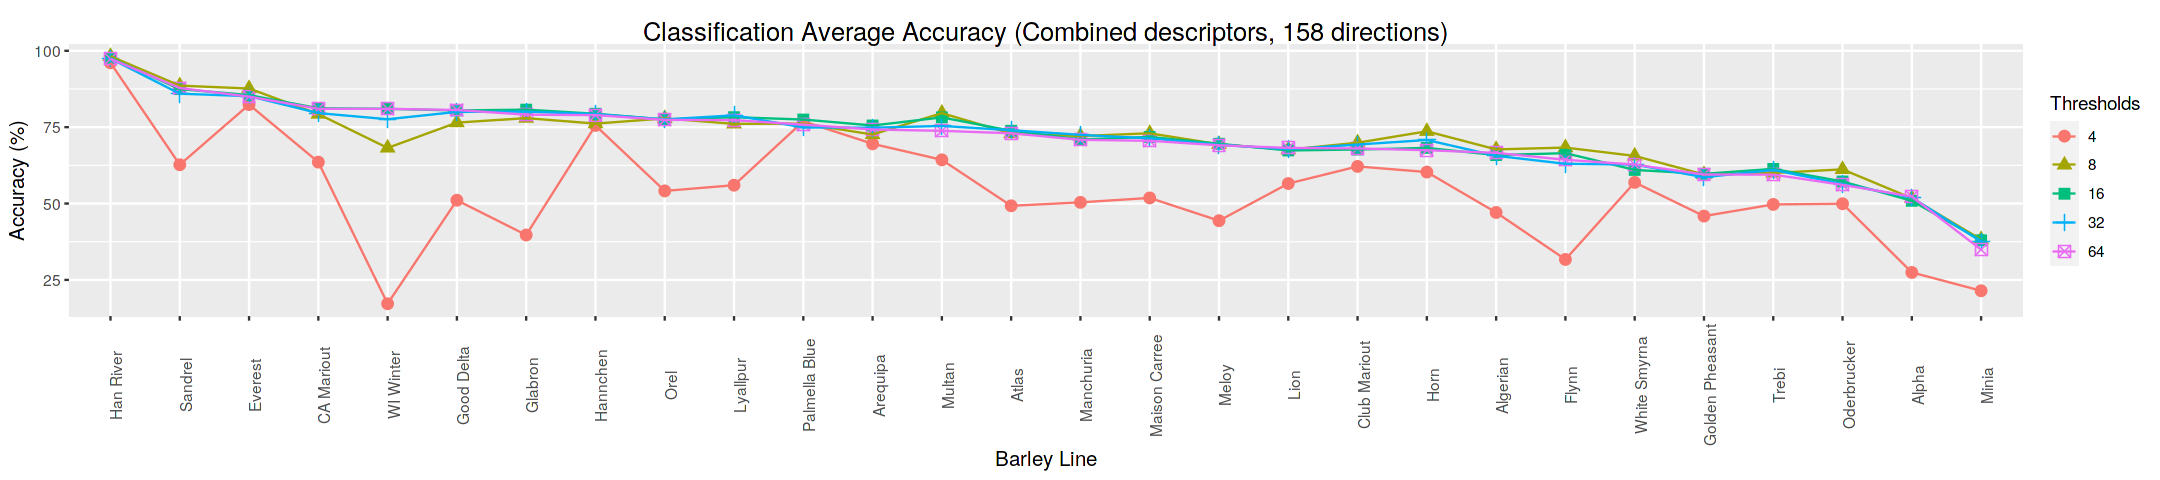

In [42]:
options(repr.plot.width=18, repr.plot.height=4)

info_type <- 'Combined'
compare_threshold_accuracies_lines(df_mixed_confusion74, as.character(TT[length(TT)]),
                                  74, info_type, kernel, dims, norm)
compare_threshold_accuracies_lines(df_mixed_confusion158, as.character(TT[length(TT)]),
                                  158, info_type, kernel, dims, norm)

In [38]:
df_topo_confusion74 <- unlist_confusion(topo_confusion_74, founders_names, TT)
df_topo_confusion158 <- unlist_confusion(topo_confusion_158, founders_names, TT)

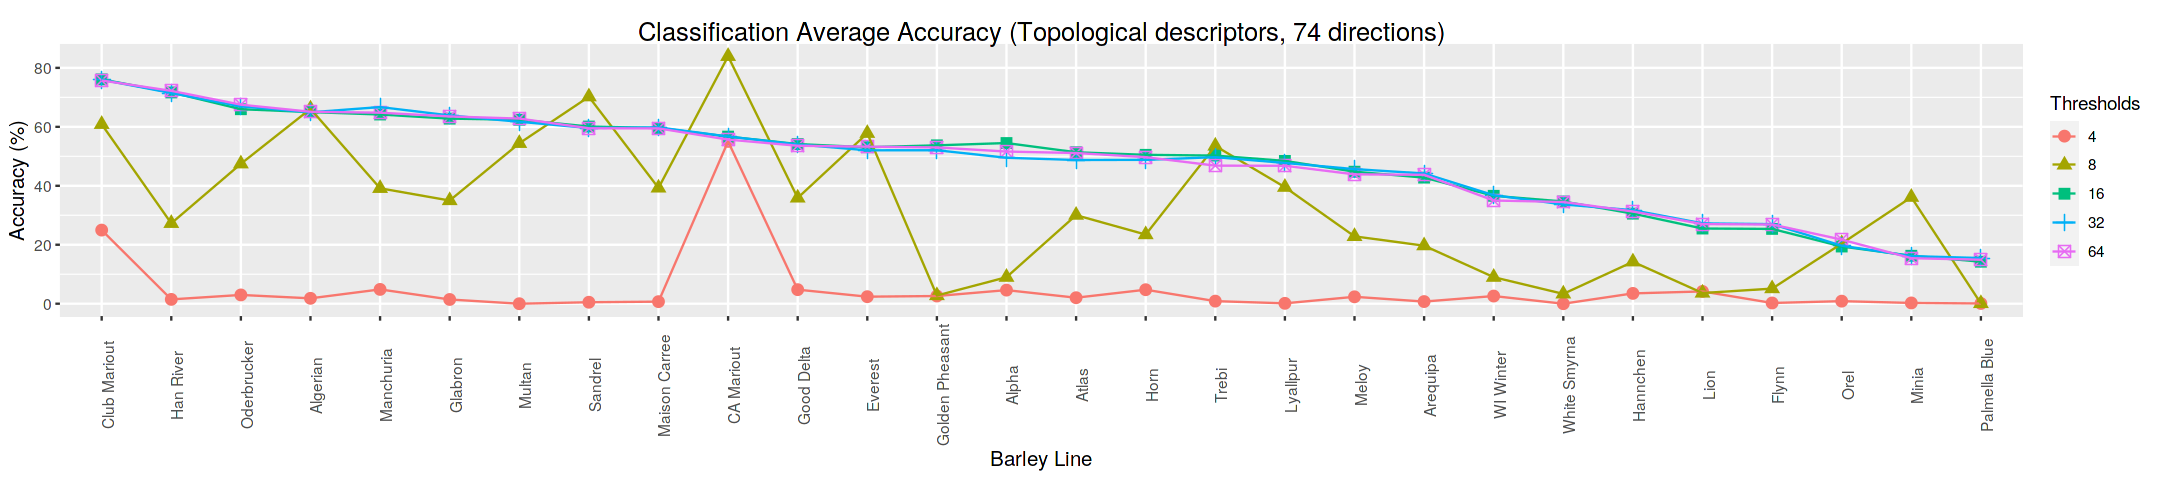

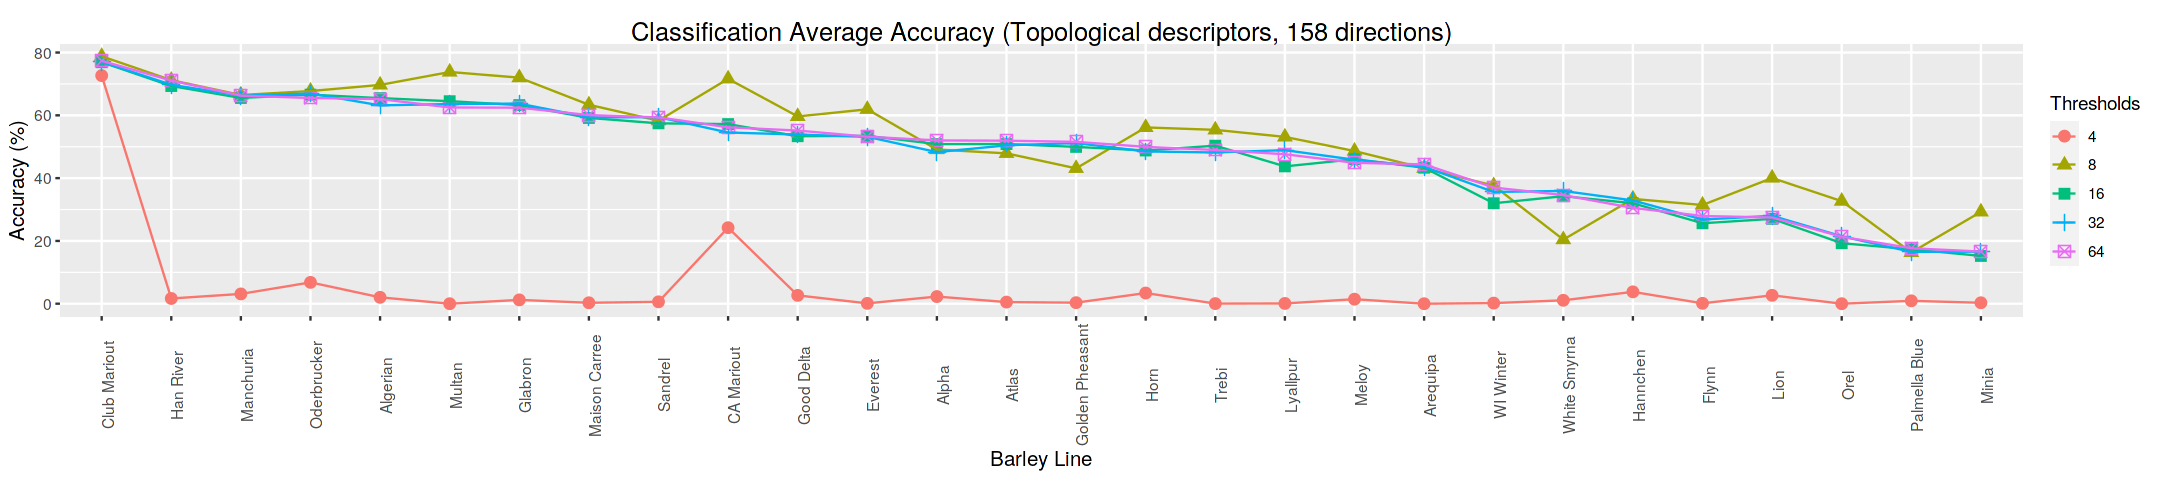

In [41]:
options(repr.plot.width=18, repr.plot.height=4)

info_type <- 'Topological'

compare_threshold_accuracies_lines(df_topo_confusion74, as.character(TT[length(TT)]),
                                  74, info_type, kernel, dims, norm)
compare_threshold_accuracies_lines(df_topo_confusion158, as.character(TT[length(TT)]),
                                  158, info_type, kernel, dims, norm)